

---



---


# Polynomial Kernel


---



---

**The Polynomial Kernel**, a popular technique used in machine learning for non-linear classification tasks. The Polynomial Kernel allows to transform input features into higher-dimensional space, enabling the linear separation of data that may not be linearly separable in the original feature space.


## Polynomial Kernel Equation

The Polynomial Kernel is defined as:

```
K(a, b) = (γ⟨a, b⟩ + r)^d
```

Where:
- ⟨a, b⟩ denotes the dot product between vectors a and b.
- γ is a scaling factor.
- r is an optional coefficient.
- d is the degree of the polynomial.

## Polynomial Kernel in SVM

In SVM, the Polynomial Kernel is used to transform the input feature space into a higher-dimensional space, making it possible to separate non-linearly separable classes using a hyperplane.




In this notebook, we will explore the Polynomial Kernel in Support Vector Machines (SVM) using the make_moons dataset.


##Import necessary libraries

In [ ]:
# Importing  libraries
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


##Load Data

This code creates a synthetic dataset with two moon-shaped clusters and plots it using matplotlib.




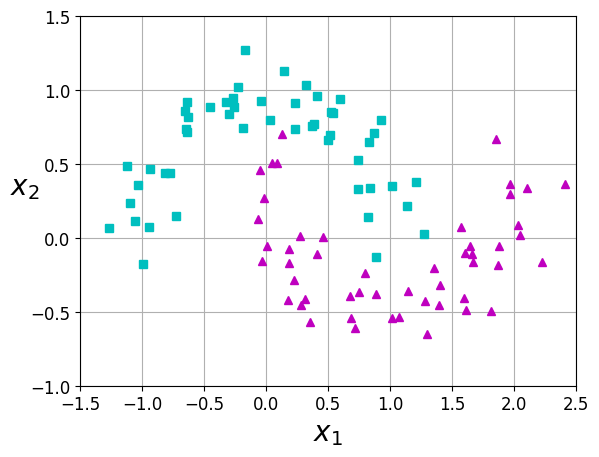

In [ ]:
# Importing the make_moons function from sklearn.datasets module, which generates a synthetic moon-shaped dataset.
from sklearn.datasets import make_moons

# Generating a synthetic dataset with 100 samples, noise level of 0.15, and a specific random state.
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Defining a function to plot the dataset with different markers for each class.
def plot_dataset(X, y, axes):
    # Plotting points for class 0 with cyan squares.
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "cs")
    # Plotting points for class 1 with magenta triangles.
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "m^")
    # Setting the axis limits based on the provided axes parameter.
    plt.axis(axes)
    # Enabling grid lines on both major and minor ticks.
    plt.grid(True, which='both')
    # Labeling x-axis with LaTeX-style formatting.
    plt.xlabel(r"$x_1$", fontsize=20)
    # Labeling y-axis with LaTeX-style formatting, and rotating it to be horizontal.
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# Calling the plot_dataset function to plot the generated dataset.
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# Displaying the plot.
plt.show()


##Model Building


The code here defines and fits a pipeline for a Polynomial Kernel SVM classifier to the provided data.

The `SVC` (Support Vector Classifier) with `kernel="poly"` is a configuration of the Support Vector Machine classifier in scikit-learn that uses a polynomial kernel to transform the input space into a higher dimensional space where a non-linear decision boundary can be used to separate classes. This approach is particularly useful for datasets that are not linearly separable in their original space.

When combining `SVC(kernel="poly")` with a `Pipeline`, we streamline the process of applying sequential preprocessing steps and classification in a single, reproducible workflow. This is especially beneficial for ensuring that steps like feature scaling, which are critical for the performance of SVMs with polynomial kernels, are consistently applied both during training and prediction phases.

For more detailed insights into `SVC(kernel="poly")` and how to integrate it within a `Pipeline`, refer to the [SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and the [Pipeline documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).


In [ ]:
# Defining a pipeline for Polynomial Kernel SVM classifier
poly_kernel_svm_clf = Pipeline([
    # Step 1: Feature scaling using StandardScaler
    ("scaler", StandardScaler()),

    # Step 2: SVM classifier with Polynomial Kernel
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

# Fitting the classifier to the data
poly_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

This code creates and trains a pipeline for a Polynomial Kernel SVM classifier with degree 10, coefficient 100, and regularization parameter C=5.

In [ ]:

# Defining a pipeline for Polynomial Kernel SVM classifier with a high degree and coef0
poly100_kernel_svm_clf = Pipeline([
    # Step 1: Feature scaling using StandardScaler
    ("scaler", StandardScaler()),

    # Step 2: SVM classifier with Polynomial Kernel, degree=10, and coef0=100
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

# Fitting the classifier to the data
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])


This function plots the decision boundary and decision contours of a trained classifier

In [ ]:
def plot_predictions(clf, axes):
    # Generating a grid of x0 values using linspace
    x0s = np.linspace(axes[0], axes[1], 100)

    # Generating a grid of x1 values using linspace
    x1s = np.linspace(axes[2], axes[3], 100)

    # Creating a mesh grid from x0 and x1 values
    x0, x1 = np.meshgrid(x0s, x1s)

    # Combining x0 and x1 values into a single array for prediction
    X = np.c_[x0.ravel(), x1.ravel()]

    # Predicting the classes for each point in the mesh grid
    y_pred = clf.predict(X).reshape(x0.shape)

    # Calculating decision function values for each point in the mesh grid
    y_decision = clf.decision_function(X).reshape(x0.shape)

    # Plotting the decision boundaries using contourf for predicted classes
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.jet, alpha=0.2)

    # Plotting the decision boundaries using contourf for decision function values
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.jet, alpha=0.1)


Here we creates a figure with two subplots, each displaying the decision boundary and contours of a Polynomial Kernel SVM classifier with different parameters.

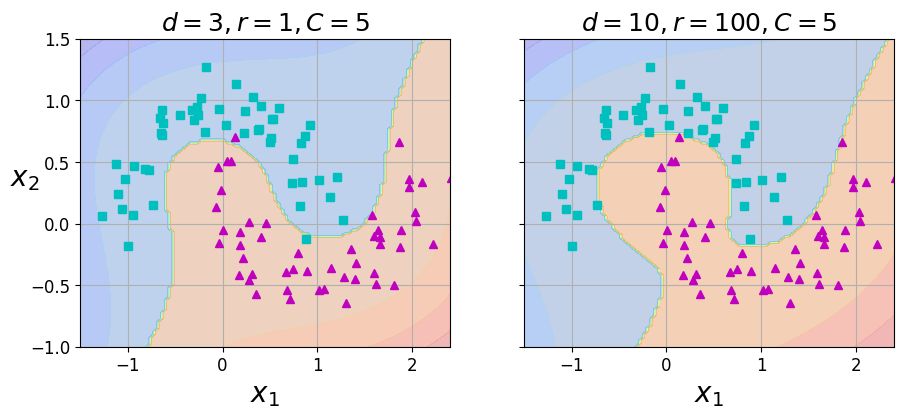

In [ ]:
# Creating a figure with two subplots arranged in a single row
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

# Selecting the first subplot for plotting
plt.sca(axes[0])

# Plotting predictions and dataset for the first SVM classifier
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])

# Setting the title for the first subplot
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

# Selecting the second subplot for plotting
plt.sca(axes[1])

# Plotting predictions and dataset for the second SVM classifier
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])

# Setting the title for the second subplot
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

# Removing ylabel from the second subplot
plt.ylabel("")

# Displaying the plot
plt.show()
